In [1]:
import numpy as np
import pandas as pd
# Numpy ve Pandas kütüphanelerini yükledim

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib ve Seaborn kütüphanelerini yükledim

In [3]:
sns.set_style("darkgrid")
# Arka planın koyu olmasını sağlayacak bir tema seçtim

In [4]:
df=pd.read_csv("starbucks.csv",index_col=0)
# Starbucks veri setimi çektim ve indexi düzgün başlamadığı için 0. indexi almadım

In [5]:
df.head()
# ilk 5 satırı görüntüledim

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [6]:
df.info()
# Veri seti hakkınıda özet bilgi istedim

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [7]:
df.describe()
# Veri seti hakkında istatistiksel özet istedim

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [8]:
df["item"].nunique()
# Kaç tane ürün olduğunu gösteriyor

77

In [9]:
df["item"].unique()
# Bu ürünlerin neler olduğunu gösteriyor

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [10]:
df["type"].unique()
# Bu ürünlerin kategorilerini gösteriyor

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [11]:
df.groupby("type")["item"].count()
# Her kategoride kaç adet ürün olduğunu gösteriyor

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

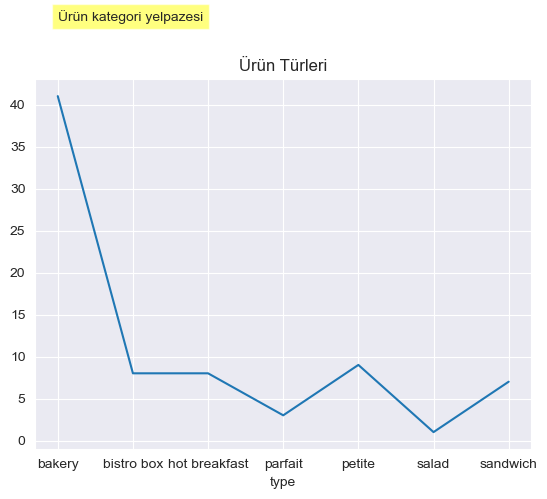

In [12]:
df.groupby("type")["item"].count().plot()
plt.title("Ürün Türleri")  
plt.text(0., 50, "Ürün kategori yelpazesi", bbox=dict(facecolor="yellow", alpha=0.5))
plt.show()
# Her kategoride kaç adet ürün olduğunun çizgi grafiği

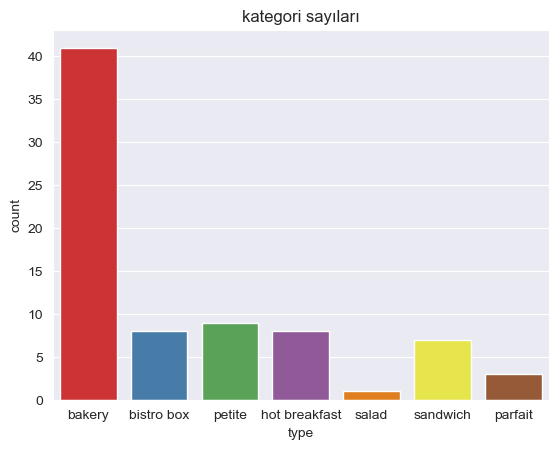

In [13]:
sns.countplot(x="type",data=df,palette="Set1")
plt.title("kategori sayıları")
plt.show()
# Her kategoride kaç adet ürün olduğunun sütun grafiği

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


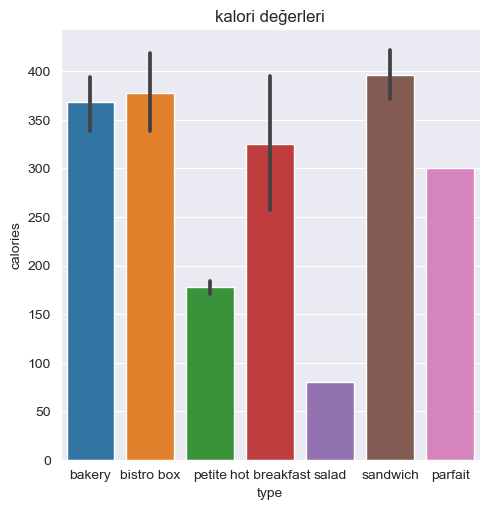

In [14]:
sns.catplot(kind="bar",x="type",y="calories",data=df)
plt.title("kalori değerleri")
plt.show(block=False)
#Kalori değerleri sütun grafiği

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


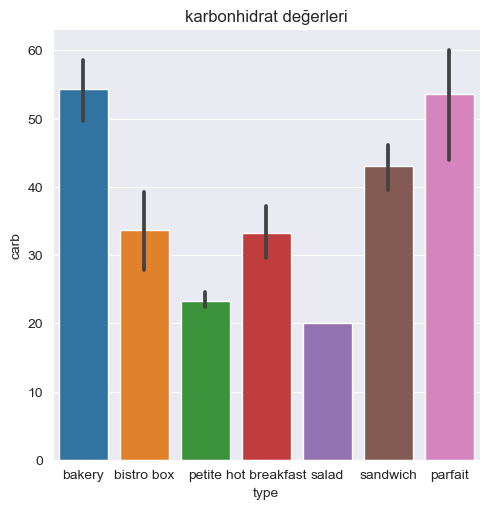

In [16]:
sns.catplot(kind="bar",x="type",y="carb",data=df)
plt.title("karbonhidrat değerleri")
plt.show(block=False)
# karbonhidrat değerleri

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


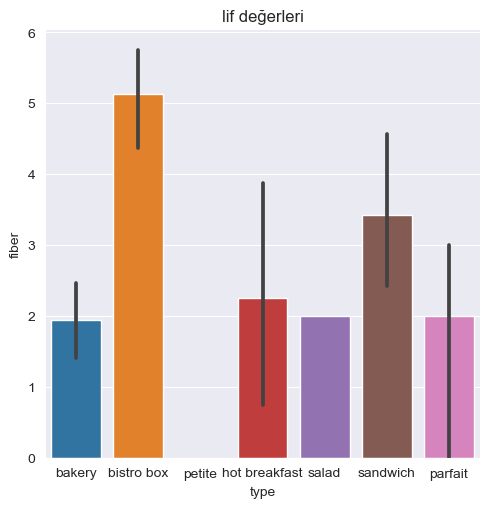

In [17]:
sns.catplot(kind="bar",x="type",y="fiber",data=df)
plt.title("lif değerleri")
plt.show(block=False)
# lif değerleri sütun grafiği

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
# Normalde korelasyon değeleri df.corr komutuyla çalışır fakat 1 kategorik veri sayısal veri kümesinde bulunduğu için
#sayısal verilerin korelasyonunu alacak bir komut yazdım

          calories       fat      carb     fiber   protein
calories  1.000000  0.758682  0.674999  0.260645  0.410398
fat       0.758682  1.000000  0.144547 -0.028549  0.223470
carb      0.674999  0.144547  1.000000  0.213044 -0.050789
fiber     0.260645 -0.028549  0.213044  1.000000  0.488564
protein   0.410398  0.223470 -0.050789  0.488564  1.000000


<Axes: >

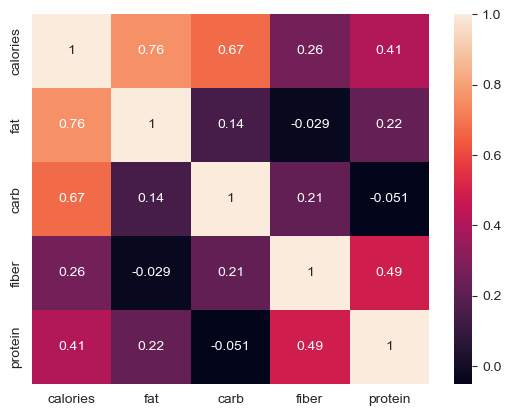

In [24]:
sns.heatmap(correlation_matrix,annot=True)
# heatmap haritalandırması

[]

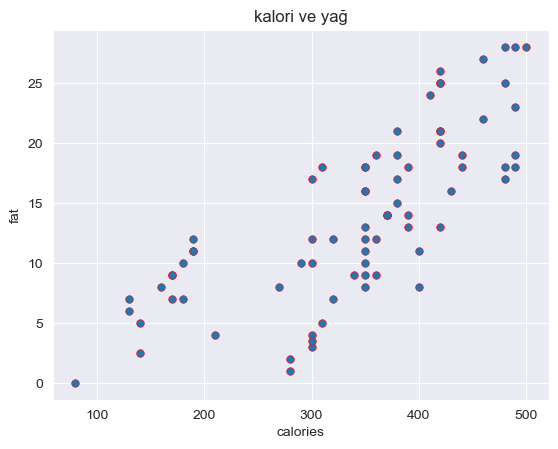

In [26]:
plt.title("kalori ve yağ")
sns.scatterplot(x="calories",y="fat",data=df,s=30,edgecolor="red")
plt.plot()
#Kalori ve yağ arasındaki korelasyonun saçılım grafiği

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


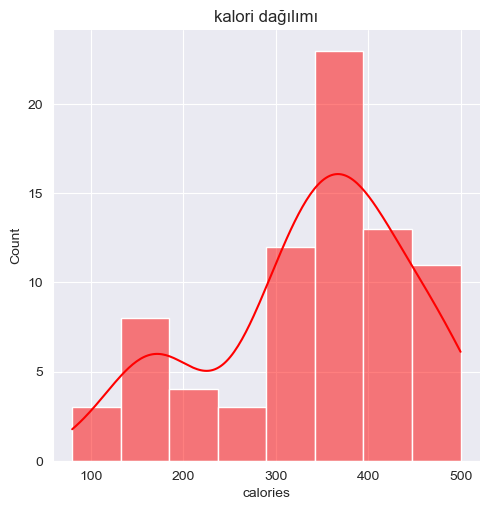

In [30]:
sns.displot(x="calories",data=df,color="red",kde=True)
plt.title("kalori dağılımı")
plt.show()
#Kalori dağılımı, ortalama bir yiğeceğin kalori ağırlığı

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


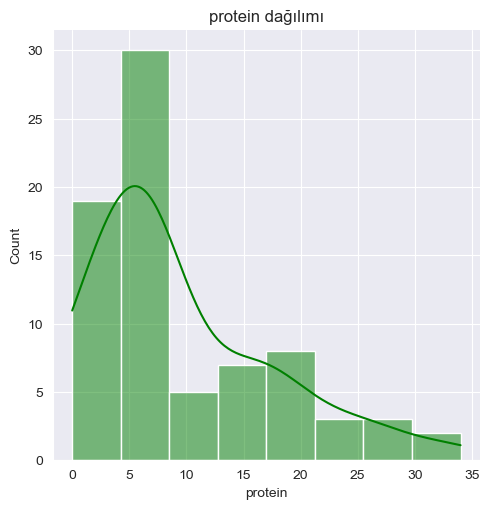

In [29]:
sns.displot(x="protein",data=df,color="green",kde=True)
plt.title("protein dağılımı")
plt.show()
#Protein dağılımı, ortalama bir yiğeceğin protein ağırlığı

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


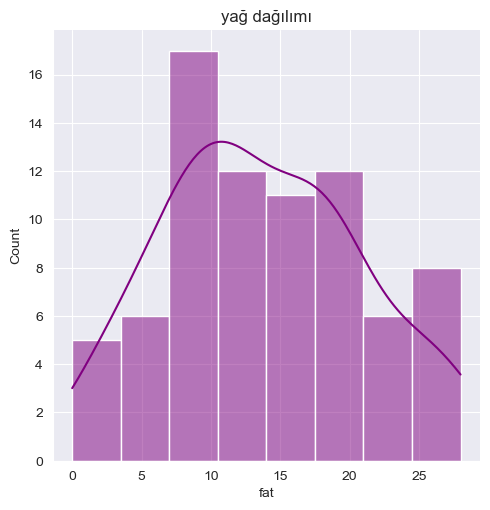

In [31]:
sns.displot(x="fat",data=df,color="purple",kde=True)
plt.title("yağ dağılımı")
plt.show()
#yağ dağılımı, ortalama bir yiğeceğin yağ ağırlığı

C:\Users\Pablo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


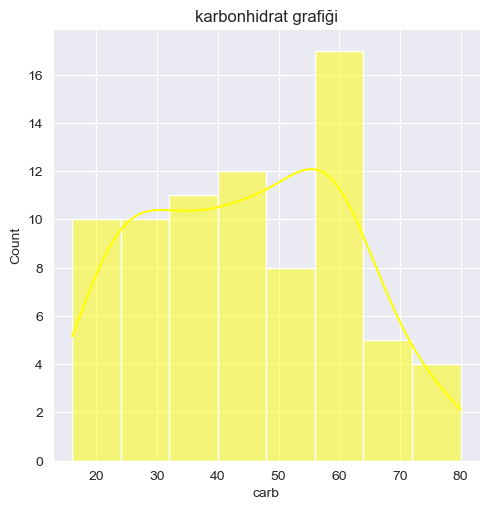

In [33]:
sns.displot(x="carb",data=df,color="yellow",kde=True)
plt.title("karbonhidrat grafiği")
plt.show()
#Karbonhidrat dağılımı, ortalama bir yiğeceğin karbonhidrat ağırlığı

In [35]:
from sklearn.model_selection import train_test_split # test alt kümelerine ayrımak için
from sklearn.tree import DecisionTreeClassifier   #karar ağacı ile sınıflandırmak için
from sklearn.metrics import accuracy_score   #sınıflandırma modellerinin doğruluğunu hesaplamak için
# bir ürünün hangi kategoriye sahip olduğunu tahmin edicez

In [37]:
x=df[["calories","fat","carb","fiber","protein"]]
y=df["type"]
# bağımlı ve bağımsız değişkenleri tanımladık

In [38]:
x

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [39]:
y

1       bakery
2       bakery
3       bakery
4       bakery
5       bakery
        ...   
73    sandwich
74    sandwich
75     parfait
76     parfait
77     parfait
Name: type, Length: 77, dtype: object

In [40]:
x_train,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
model=DecisionTreeClassifier()
model.fit(x_train,ytrain)

DecisionTreeClassifier()

In [43]:
y_pred=model.predict(xtest)

In [44]:
accuracy=accuracy_score(ytest,y_pred)

In [45]:
print("doğruluk",accuracy)

doğruluk 0.6875


In [48]:
prediction=model.predict([[250,2,40,7,9]])
# besin değerlerini verdiğimizde o ürünün hangi kategoride olduğunu tahmin edecek model

C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [49]:
print(prediction)

['bakery']


In [50]:
from sklearn.tree import plot_tree

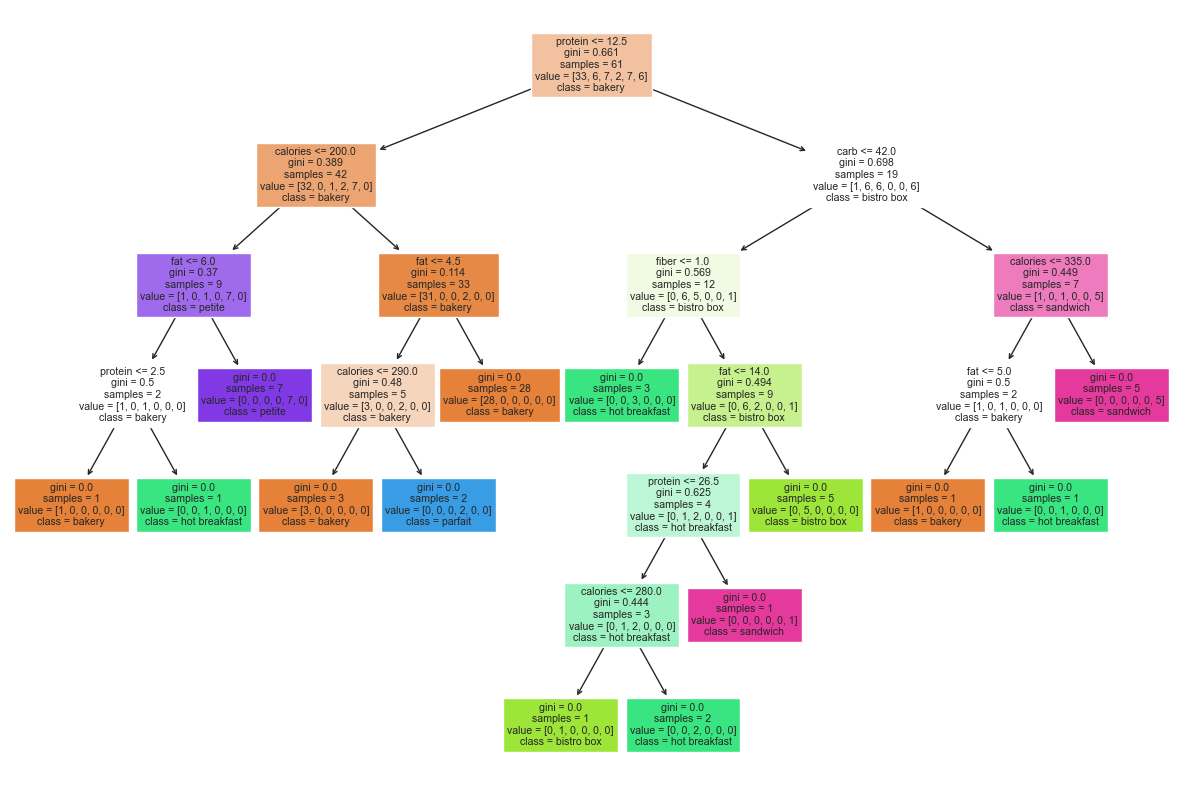

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Grafiğin boyutunu ayarlama
plt.figure(figsize=(15, 10))

# Karar ağacını çizme
plot_tree(model, feature_names=list(x.columns), class_names=list(model.classes_), filled=True)

# Grafiği gösterme
plt.show()
